In [15]:
import geemap
import ee
import geopandas as gpd
import pandas as pd
import datetime

In [16]:
#Initialise
ee.Initialize()

In [17]:
ee.Authenticate()


True

In [3]:
#create map
m = geemap.Map()

# Set the zoom point to Kenya
m.setCenter(37.9062, -0.0236, 6)  # Longitude, Latitude, Zoom level

# Display the map
m

Map(center=[-0.0236, 37.9062], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

In [4]:
co_dataset = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CO').select('CO_column_number_density').filterDate('2020-01-01', '2021-01-01').mean()

band_viz = {
  'min': 0,
  'max': 0.05,
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

m.addLayer(co_dataset, band_viz, 'S5P CO')


In [5]:
no2_dataset = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2') \
.select('tropospheric_NO2_column_number_density') \
.filterDate('2020-01-01', '2021-01-01')

band_viz = {
    "min": 0,
    "max": 0.0002,
    "palette": ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

m.addLayer(no2_dataset.mean(), band_viz, 'S5P N02')

In [6]:
kenya_counties = gpd.read_file('data/geospatial/kenyan-counties.geojson')
kenya_counties.columns

Index(['OBJECTID', 'AREA', 'PERIMETER', 'COUNTY3_', 'COUNTY3_ID', 'COUNTY',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [7]:
#export as  shapefile and zip it
selected_columns.to_file("data/geospatial/kenyan-counties.shp")

In [17]:
#load subcounties
kenya_subcounties = gpd.read_file('data/geospatial/kenya-subcounties-simplified.geojson')

In [22]:
kenya_subcounties.columns

Index(['Shape_Leng', 'Shape_Area', 'shapeName', 'Level', 'shapeID',
       'shapeGroup', 'shapeType', 'geometry'],
      dtype='object')

In [25]:
#export as  shapefile
kenya_subcounties.to_file("data/geospatial/kenya-subcounties.shp")

In [24]:
selected_subcounties = kenya_subcounties[["shapeName", "geometry"]]

In [14]:
#Counties feature collection
asset_path = 'projects/ee-heat-001/assets/kenyan-counties'
kenya_counties = ee.FeatureCollection(asset_path)

In [11]:
#add as layer
m.addLayer(kenya_counties, {}, 'Kenyan Counties')

In [12]:
# #compute zonal stats
output_file = 'data/computed_stats/kenya_co_stats.csv'

geemap.zonal_stats(co_dataset, kenya_counties, output_file,stat_type="MEAN",scale=1000, return_fc=False)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /workspaces/air-quality-monitor/data/computed_stats/kenya_co_stats.csv


In [8]:
#Subcounties feature collection
asset_path_sub='projects/ee-heat-001/assets/kenya-subcounties'
kenya_subcounties = ee.FeatureCollection(asset_path_sub)

In [27]:
#use to compute zonal stats
output_file_sub = 'data/computed_stats/kenya_co_stats_sub.csv'
geemap.zonal_stats(co_dataset, kenya_subcounties, output_file_sub,stat_type="MEAN",scale=1000, return_fc=False)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /workspaces/air-quality-monitor/data/computed_stats/kenya_co_stats_sub.csv


In [28]:
geemap.csv_to_df(output_file_sub).head()

,mean,Shape_Leng,shapeGroup,shapeType,shapeID,Shape_Area,Level,shapeName,system:index
0,0.024584,1.746986,KEN,ADM2,KEN-ADM2-3690345B56101260,0.040829,ADM2,Ainabkoi,00000000000000000000
1,0.027296,0.917307,KEN,ADM2,KEN-ADM2-3690345B87011697,0.019957,ADM2,Ainamoi,00000000000000000001
2,0.028365,1.402637,KEN,ADM2,KEN-ADM2-3690345B66326805,0.038000,ADM2,Aldai,00000000000000000002
3,0.031679,1.081354,KEN,ADM2,KEN-ADM2-3690345B40354507,0.049357,ADM2,Alego Usonga,00000000000000000003
4,0.029916,0.743915,KEN,ADM2,KEN-ADM2-3690345B85995800,0.021365,ADM2,Awendo,00000000000000000004


In [30]:
output_file_no2 = 'data/computed_stats/kenya_no2_stats.csv'
geemap.zonal_stats(no2_dataset.mean(), kenya_counties, output_file_no2, stat_type="MEAN", scale=1000, return_fc=False)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /workspaces/air-quality-monitor/data/computed_stats/kenya_no2_stats.csv


In [31]:
geemap.csv_to_df(output_file_no2).head()

,mean,system:index,COUNTY
0,0.000007,00000000000000000000,Turkana
1,0.000007,00000000000000000001,Marsabit
2,0.000005,00000000000000000002,Mandera
3,0.000006,00000000000000000003,Wajir
4,0.000006,00000000000000000004,West Pokot


In [32]:
output_file_no2_sub = 'data/computed_stats/kenya_no2_stats_sub.csv'
geemap.zonal_stats(no2_dataset.mean(), kenya_subcounties, output_file_no2_sub, stat_type="MEAN", scale=1000, return_fc=False)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /workspaces/air-quality-monitor/data/computed_stats/kenya_no2_stats_sub.csv


In [10]:
africa_fc = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(
    ee.Filter.eq("wld_rgn", "Africa")
)

In [29]:
#download africa_fc as geojson
geemap.ee_to_geojson(africa_fc, 'data/geospatial/africa.geojson')

In [30]:
#load and check crs
africa = gpd.read_file('data/geospatial/africa.geojson')
africa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
import datetime

# Define the date range
start_date = '2018-06-28'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Load the NO2 dataset
no2_dataset = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2')

# Load the African countries shapefile
countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
african_countries = countries.filter(ee.Filter.eq('wld_rgn', 'Africa'))

# Define the function to compute monthly averages
def compute_monthly_no2_averages(start_date, end_date):
    # Define the date range
    start = ee.Date(start_date)
    end = ee.Date(end_date)
    
    # Generate a list of months
    months = pd.date_range(start_date, end_date, freq='MS').strftime("%Y-%m").tolist()

    all_stats = []

    for month in months:
        month_start = ee.Date(f'{month}-01')
        month_end = month_start.advance(1, 'month')
        
        # Filter the NO2 dataset for the month and select the band
        monthly_no2 = no2_dataset.filterDate(month_start, month_end).select('NO2_column_number_density').mean()
        
        # Ensure the image has the band
        if monthly_no2.bandNames().size().getInfo() == 0:
            print(f"No data for {month}")
            continue
        
        # Compute the zonal statistics for each country
        stats = geemap.zonal_stats(
            monthly_no2, 
            african_countries, 
            None,  # No need to save intermediate files
            stat_type='MEAN', 
            scale=1000, 
            return_fc=True
        )
        
        # Convert the results to a DataFrame and add the month column
        df = geemap.ee_to_df(stats)
        df['month'] = month
        all_stats.append(df)
    
    # Concatenate all monthly DataFrames into a single DataFrame
    final_df = pd.concat(all_stats, ignore_index=True)
    
    # Save the final DataFrame to a CSV file
    final_output_file = 'data/computed_stats/african_countries_no2_monthly.csv'
    final_df.to_csv(final_output_file, index=False)
    
    return final_output_file

# Compute the monthly NO2 averages
final_output_file = compute_monthly_no2_averages(start_date, end_date)
print(f'Monthly NO2 averages saved to {final_output_file}')

Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...


In [11]:
#Computation of Formaldehyde
# Define the date range
start_date = '2018-10-02'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Load the NO2 dataset
formaldehyde_dataset = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_HCHO')

# Load the African countries shapefile
countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
african_countries = countries.filter(ee.Filter.eq('wld_rgn', 'Africa'))

# Define the function to compute monthly averages
def compute_monthly_formaldehyde_averages(start_date, end_date):
    # Define the date range
    start = ee.Date(start_date)
    end = ee.Date(end_date)
    
    # Generate a list of months
    months = pd.date_range(start_date, end_date, freq='MS').strftime("%Y-%m").tolist()

    all_stats = []

    for month in months:
        month_start = ee.Date(f'{month}-01')
        month_end = month_start.advance(1, 'month')
        
        # Filter the NO2 dataset for the month and select the band
        monthly_formaldehyde = formaldehyde_dataset.filterDate(month_start, month_end).select('tropospheric_HCHO_column_number_density').mean()
        
        # Ensure the image has the band
        if monthly_formaldehyde.bandNames().size().getInfo() == 0:
            print(f"No data for {month}")
            continue
        
        # Compute the zonal statistics for each country
        stats = geemap.zonal_stats(
            monthly_formaldehyde, 
            african_countries, 
            None,  # No need to save intermediate files
            stat_type='MEAN', 
            scale=1000, 
            return_fc=True
        )
        
        # Convert the results to a DataFrame and add the month column
        df = geemap.ee_to_df(stats)
        df['month'] = month
        all_stats.append(df)
    
    # Concatenate all monthly DataFrames into a single DataFrame
    final_df = pd.concat(all_stats, ignore_index=True)
    
    # Save the final DataFrame to a CSV file
    final_output_file = 'data/computed_stats/african_countries_formaldehyde_monthly.csv'
    final_df.to_csv(final_output_file, index=False)
    
    return final_output_file

# Compute the monthly NO2 averages
final_output_file = compute_monthly_formaldehyde_averages(start_date, end_date)
print(f'Monthly Formaldehyde averages saved to {final_output_file}')


Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...


KeyboardInterrupt: 

In [15]:
# Define the date range
start_date = '2019-02-08'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Load the Methane dataset
methane_dataset = ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_CH4")

# Define the function to compute monthly averages
def compute_monthly_methane_averages(start_date, end_date):
    # Define the date range
    start = ee.Date(start_date)
    end = ee.Date(end_date)
    
    # Generate a list of months
    months = pd.date_range(start_date, end_date, freq='MS').strftime("%Y-%m").tolist()

    all_stats = []

    for month in months:
        month_start = ee.Date(f'{month}-01')
        month_end = month_start.advance(1, 'month')
        
        # Filter the Methane dataset for the month and select the band
        monthly_methane = methane_dataset.filterDate(month_start, month_end).select('CH4_column_volume_mixing_ratio_dry_air').mean()
        
        # Ensure the image has the band
        if monthly_methane.bandNames().size().getInfo() == 0:
            print(f"No data for {month}")
            continue
        
        # Compute the zonal statistics for each country
        stats = geemap.zonal_stats(
            monthly_methane, 
            african_countries, 
            None,  # No need to save intermediate files
            stat_type='MEAN', 
            scale=1000, 
            return_fc=True
        )
        
        # Convert the results to a DataFrame and add the month column
        df = geemap.ee_to_df(stats)
        df['month'] = month
        all_stats.append(df)
    
    # Concatenate all monthly DataFrames into a single DataFrame
    final_df = pd.concat(all_stats, ignore_index=True)
    
    # Save the final DataFrame to a CSV file
    final_output_file = 'data/computed_stats/african_countries_methane_monthly.csv'
    final_df.to_csv(final_output_file, index=False)
    
    return final_output_file

# Compute the monthly Methane averages
final_output_file = compute_monthly_methane_averages(start_date, end_date)
print(f'Monthly Methane averages saved to {final_output_file}')

Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...


In [16]:
geemap.csv_to_df('data/computed_stats/african_countries_methane_monthly.csv').head()

,abbreviati,country_co,country_na,mean,wld_rgn,month
0,NaN,CD,Chad,1871.634114,Africa,2019-03
1,Mal.,MI,Malawi,1824.224609,Africa,2019-03
2,Zam.,ZA,Zambia,1819.263504,Africa,2019-03
3,Zimb.,ZI,Zimbabwe,1821.346464,Africa,2019-03
4,Bots.,BC,Botswana,1829.074579,Africa,2019-03


In [17]:
m = geemap.Map()

#set the zoom point to Kenya
m.setCenter(37.9062, -0.0236, 6)  # Longitude, Latitude, Zoom level

m

Map(center=[-0.0236, 37.9062], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

<IPython.core.display.Javascript object>

In [19]:
collection = ee.ImageCollection('MODIS/061/MCD19A2_GRANULES') \
.select('Optical_Depth_047') \
.filterDate('2023-01-01', '2023-01-15')

band_viz = {
    "min": 0,
    "max": 1100,
    "palette": ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

m.addLayer(collection.mean(), band_viz, 'Optical Depth 047')

In [5]:
#Extract monthly methane averages for Kenyan counties
# Define the date range
start_date = '2019-02-08'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Load the Methane dataset
methane_dataset = ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_CH4")

# Define the function to compute monthly averages
def compute_monthly_methane_averages(start_date, end_date):
    # Define the date range
    start = ee.Date(start_date)
    end = ee.Date(end_date)
    
    # Generate a list of months
    months = pd.date_range(start_date, end_date, freq='MS').strftime("%Y-%m").tolist()

    all_stats = []

    for month in months:
        month_start = ee.Date(f'{month}-01')
        month_end = month_start.advance(1, 'month')
        
        # Filter the Methane dataset for the month and select the band
        monthly_methane = methane_dataset.filterDate(month_start, month_end).select('CH4_column_volume_mixing_ratio_dry_air').mean()
        
        # Ensure the image has the band
        if monthly_methane.bandNames().size().getInfo() == 0:
            print(f"No data for {month}")
            continue
        
        # Compute the zonal statistics for each county
        stats = geemap.zonal_stats(
            monthly_methane, 
            kenya_counties, 
            None,  # No need to save intermediate files
            stat_type='MEAN', 
            scale=1000, 
            return_fc=True
        )
        
        # Convert the results to a DataFrame and add the month column
        df = geemap.ee_to_df(stats)
        df['month'] = month
        all_stats.append(df)
    
    # Concatenate all monthly DataFrames into a single DataFrame
    final_df = pd.concat(all_stats, ignore_index=True)
    
    # Save the final DataFrame to a CSV file
    final_output_file = 'data/computed_stats/kenyan_counties_methane_monthly.csv'
    final_df.to_csv(final_output_file, index=False)
    
    return final_output_file

# Compute the monthly Methane averages
final_output_file = compute_monthly_methane_averages(start_date, end_date)
print(f'Monthly Methane averages saved to {final_output_file}')

Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...


In [7]:
methane_counties = geemap.csv_to_df("data/computed_stats/kenyan_counties_methane_monthly.csv").head()

In [8]:
methane_counties["mean_ppm"] = methane_counties["mean"] / 1000
methane_counties.head()

,COUNTY,mean,month,mean_ppm
0,Turkana,1855.800720,2019-03,1.855801
1,Marsabit,1852.726949,2019-03,1.852727
2,Mandera,1856.138733,2019-03,1.856139
3,Wajir,1856.712832,2019-03,1.856713
4,West Pokot,1845.439213,2019-03,1.845439


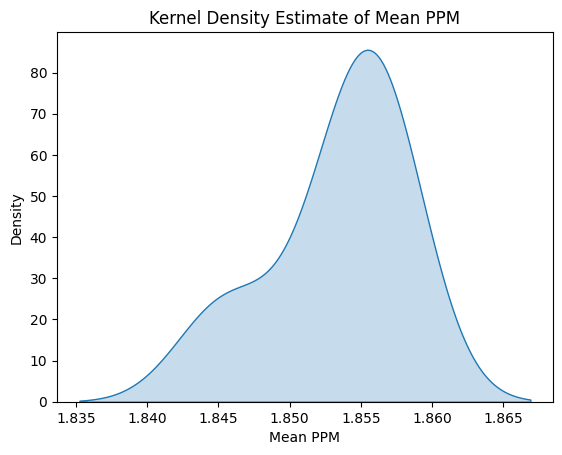

In [13]:
import seaborn as sns

methane_counties["mean_ppm"]
import matplotlib.pyplot as plt

sns.kdeplot(methane_counties["mean_ppm"], fill=True)
plt.title('Kernel Density Estimate of Mean PPM')
plt.xlabel('Mean PPM')
plt.ylabel('Density')
plt.show()

In [18]:
#Computation of Formaldehyde
# Define the date range
start_date = '2018-10-02'
end_date = '2024-10-05'

# Load the Formaldehyde dataset
formaldehyde_dataset = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_HCHO')

# Define the function to compute monthly averages
def compute_monthly_formaldehyde_averages(start_date, end_date):
    # Define the date range
    start = ee.Date(start_date)
    end = ee.Date(end_date)
    
    # Generate a list of months
    months = pd.date_range(start_date, end_date, freq='MS').strftime("%Y-%m").tolist()

    all_stats = []

    for month in months:
        month_start = ee.Date(f'{month}-01')
        month_end = month_start.advance(1, 'month')
        
        # Filter the Formaldehyde dataset for the month and select the band
        monthly_formaldehyde = formaldehyde_dataset.filterDate(month_start, month_end).select('tropospheric_HCHO_column_number_density').mean()
        
        # Ensure the image has the band
        if monthly_formaldehyde.bandNames().size().getInfo() == 0:
            print(f"No data for {month}")
            continue
        
        # Compute the zonal statistics for each county
        stats = geemap.zonal_stats(
            monthly_formaldehyde, 
            kenya_counties, 
            None,  # No need to save intermediate files
            stat_type='MEAN', 
            scale=1000, 
            return_fc=True
        )
        
        # Convert the results to a DataFrame and add the month column
        df = geemap.ee_to_df(stats)
        df['month'] = month
        all_stats.append(df)
    
    # Concatenate all monthly DataFrames into a single DataFrame
    final_df = pd.concat(all_stats, ignore_index=True)
    
    # Save the final DataFrame to a CSV file
    final_output_file = 'data/computed_stats/kenyan_counties_formaldehyde_monthly.csv'
    final_df.to_csv(final_output_file, index=False)
    
    return final_output_file

# Compute the monthly Formaldehyde averages
final_output_file = compute_monthly_formaldehyde_averages(start_date, end_date)
print(f'Monthly Formaldehyde averages saved to {final_output_file}')


Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
